In [37]:
#Reading and Understanding the data
#importing the required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sbn
import matplotlib.pyplot as plt

In [38]:
#Reading and Understanding the data
path = 'annual_crime.csv'
#attributes = ['REGION (COUNTIES)','HOMICIDE','OFFENCES AGAINST MORALITY','OTHER OFFENCES AGAINST PERSONS', 'ROBBERY','BREAKINGS','THEFT OF STOCK','STEALING','THEFT BY SERVANT','VEHICLE AND OTHER THEFTS','DANGEROUS DRUGS','TRAFFIC OFFENCES','CRIMINAL DAMAGE','ECONOMIC CRIMES','CORRUPTION','OFFENCES INVOLVING POLICE OFFICERS','OFFENCES INVOLVING TOURIST','OTHER PENAL CODE OFFENCES','GRAND TOTAL']
Dataframe2=pd.read_csv(path)
Dataframe2

,REGION (COUNTIES),HOMICIDE,OFFENCES AGAINST MORALITY,OTHER OFFENCES AGAINST PERSONS,ROBBERY,BREAKINGS,THEFT OF STOCK,STEALING,THEFT BY SERVANT,VEHICLE AND OTHER THEFTS,DANGEROUS DRUGS,TRAFFIC OFFENCES,CRIMINAL DAMAGE,ECONOMIC CRIMES,CORRUPTION,OFFENCES INVOLVING POLICE OFFICERS,OFFENCES INVOLVING TOURIST,OTHER PENAL CODE OFFENCES,Crime_threshold,GRAND TOTAL
0,NAIROBI,29,42,347,8,42,10,58,3,0,39,1,34,7,2,4,1,48,0.0,675
1,NAKURU,8,35,127,21,51,13,54,19,12,9,0,35,20,6,1,0,96,0.0,507
2,KIAMBU,120,194,1620,144,253,126,1194,68,29,208,0,467,160,1,3,0,530,1.0,5117
3,MOMBASA,40,46,288,6,40,18,71,5,6,62,1,50,14,0,0,0,75,0.0,722
4,BUNGOMA,52,108,510,13,79,14,167,47,8,159,0,141,36,4,2,0,93,0.0,1433
5,KAKAMEGA,63,173,498,27,117,72,198,24,19,194,0,89,46,2,1,1,155,1.0,1679
6,MURANGA,59,162,633,85,208,65,282,135,46,325,3,137,82,1,3,0,226,1.0,2452
7,KISUMU,83,174,437,38,105,31,171,83,20,138,1,123,43,2,1,0,180,1.0,1630
8,KILIFI,68,159,338,44,147,51,174,57,8,161,0,89,35,1,0,0,141,0.0,1473
9,KISII,106,133,388,114,162,39,224,66,29,206,2,113,48,5,0,0,157,1.0,1792


In [39]:
#Preparing Data for Decision Tree 
X=Dataframe2.iloc[:49,:-1].values
y=Dataframe2.iloc[:49,-2].values

In [40]:
#Preparing Data for Decision Tree - preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X[:,0]=labelencoder.fit_transform(X[:,0])
y=y.astype(int)

In [41]:
#Preparing Data for Decision Tree - preprocessing(Transforming and cleansing)
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [42]:
#Comprasing (Decomposing) the data to two attributes
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X=pca.fit_transform(X)

In [43]:
#Split Sample into Test and Train Samples
#Data is divided split into the following two samples using train_test_split () function

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

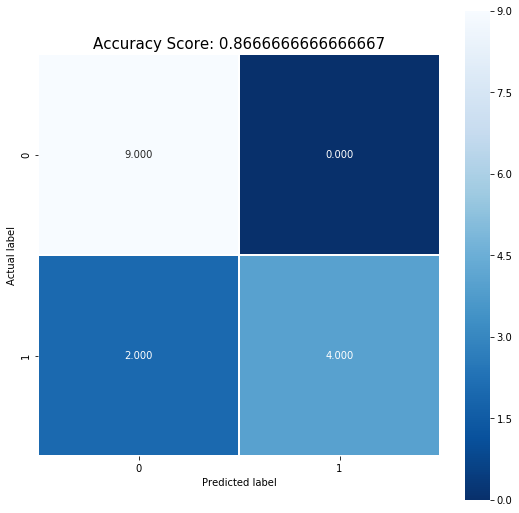

In [44]:
####Creating and fiting the classifier#
#importng libraries
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0,max_leaf_nodes=10,
                                  max_features='auto')

#entropy - appys information gain
classifier.fit(X_train,y_train)

#Predicting test set results
y_pred=classifier.predict(X_test)

#Marking a confusion matrix for evauation
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

#Score a new sample data
#accuracy score 
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

#visualizing 
plt.figure(figsize=(9,9))
sbn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

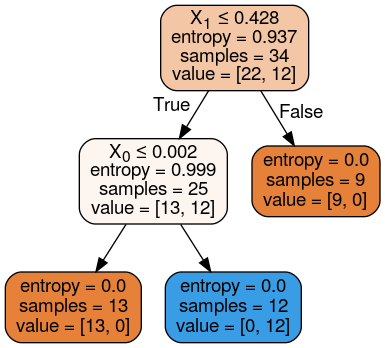

In [45]:
#Visualizing the Decision Tree - The output of visualization is as follows 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

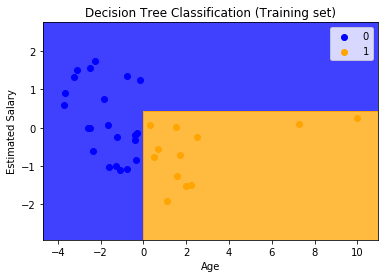

In [51]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Nature of Crime')
plt.ylabel('Estimated crime threshold')
plt.legend()
plt.show()

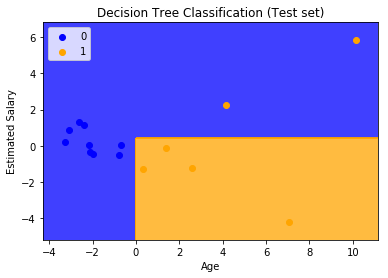

In [50]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'orange'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Nature of Crime')
plt.ylabel('Estimated crime threshold')
plt.legend()
plt.show()

In [ ]:
#Above Conclusion - regions that has high probability for crime occurrence/ high crimethreshold - Blue colour
#regions that has low probability for crime occurrence/ low crimethreshold - Orange colour